In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [55]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              188 non-null    int64 
 1   Gender                  188 non-null    object
 2   Age                     188 non-null    int64 
 3   Annual Income (k$)      188 non-null    int64 
 4   Spending Score (1-100)  188 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.5+ KB


In [57]:
from sklearn.preprocessing import LabelEncoder
 
# label_encoder object knows how to understand word labels.
LE = LabelEncoder()
 
# Encode labels in column 'species'.
df['Gender']= LE.fit_transform(df['Gender'])
 
df['Gender'].unique()

array([1, 0])

In [58]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [59]:
pca = PCA(n_components=2)

In [60]:
r_data = pca.fit_transform(df)
r_data

array([[-115.3611152 ,    4.69969593],
       [-113.91359356,  -35.83256032],
       [-113.57144643,   37.15028267],
       [-111.75200738,  -31.45991033],
       [-110.99343893,    6.41133012],
       [-109.52246003,  -30.66894184],
       [-109.24420768,   40.49359552],
       [-107.06175326,  -47.98014883],
       [-107.31941802,   49.78885407],
       [ -92.12742748,  -26.82665602],
       [ -91.89792251,   44.13089761],
       [ -89.94985396,  -25.48260379],
       [ -88.80992528,   37.15002897],
       [ -86.76882908,  -34.64750041],
       [ -86.66155063,   17.64484592],
       [ -85.27267132,  -12.82294349],
       [ -84.39479222,   17.56220322],
       [ -82.58648072,  -40.78000804],
       [ -82.70177024,   48.30949689],
       [ -80.51852242,  -27.52287635],
       [ -79.59254125,   46.83420889],
       [ -77.19612324,  -46.66279981],
       [ -77.59646091,   36.22619218],
       [ -75.54121825,  -35.25154417],
       [ -75.25851488,   31.8038005 ],
       [ -73.49671721,  -

In [61]:
data = preprocessing.scale(r_data)

In [62]:
data = pd.DataFrame(data,columns=['X','Y'])
data.head()

,X,Y
0,-1.909202,0.182062
1,-1.885246,-1.388120
2,-1.879583,1.439168
3,-1.849472,-1.218728
4,-1.836918,0.248369


# **K-Means Clustering**

In [63]:
sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(data)
  sse.append(km.inertia_)

C:\Users\14102\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of squared error')

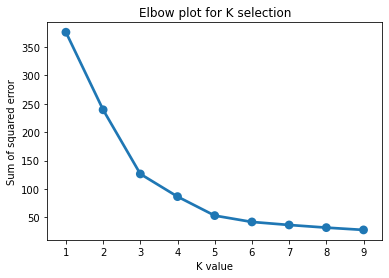

In [64]:
#plt.plot(np.arange(1,10),sse)
sns.pointplot(x=np.arange(1,10),y=sse)
plt.title('Elbow plot for K selection')
plt.xlabel('K value')
plt.ylabel('Sum of squared error')

In [65]:
from kneed import KneeLocator
kl = KneeLocator(np.arange(1,10), sse, S=1.0, curve="convex", direction="decreasing")
print(kl.elbow)

3


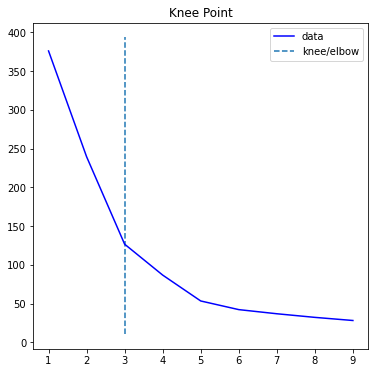

In [66]:
kl.plot_knee()

In [67]:
kmeans = KMeans(n_clusters=4)

In [68]:
cluster = kmeans.fit_predict(data[['X','Y']])

In [69]:
data['cluster'] = cluster

In [70]:
data.head()

,X,Y,cluster
0,-1.909202,0.182062,1
1,-1.885246,-1.388120,2
2,-1.879583,1.439168,1
3,-1.849472,-1.218728,2
4,-1.836918,0.248369,1


In [71]:
data['cluster'].value_counts()

1    94
0    39
3    38
2    17
Name: cluster, dtype: int64

In [72]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]
df4 = data[data['cluster']==3]

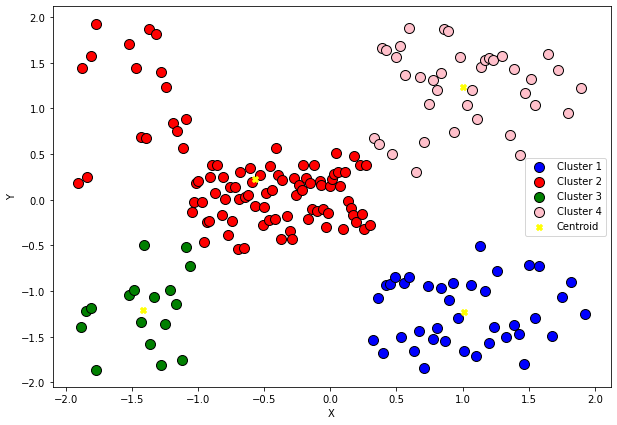

In [73]:
plt.figure(figsize=(10,7))
plt.scatter(df1.values[:,0],df1.values[:,1],color="blue",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(df2.values[:,0],df2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)
plt.scatter(df3.values[:,0],df3.values[:,1],color="green",label='Cluster 3', edgecolors='black',s=100)
plt.scatter(df4.values[:,0],df4.values[:,1],color="pink",label='Cluster 4', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='X',color='yellow',label='Centroid')
plt.legend()

# **DBSCAN Clustering**

In [74]:
db = DBSCAN(eps=1.0,metric='euclidean')

In [75]:
pr = db.fit_predict(data)

In [76]:
data['cluster']=pr

In [77]:
data.head()

,X,Y,cluster
0,-1.909202,0.182062,0
1,-1.885246,-1.388120,1
2,-1.879583,1.439168,0
3,-1.849472,-1.218728,1
4,-1.836918,0.248369,0


In [78]:
data['cluster'].value_counts()

0    94
2    39
3    38
1    17
Name: cluster, dtype: int64

In [79]:
outliers_data = data[data['cluster']==-1]
cluster1_data = data[data['cluster']==0]
cluster2_data = data[data['cluster']==1]
cluster3_data = data[data['cluster']==2]
cluster4_data = data[data['cluster']==3]

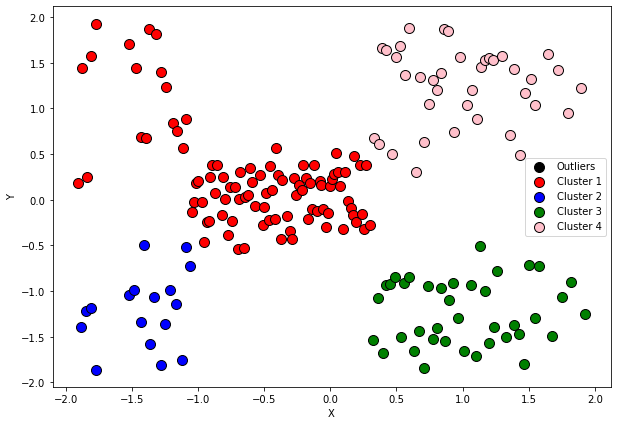

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(outliers_data['X'],outliers_data['Y'],color='black',label='Outliers', edgecolors='black',s=100)
plt.scatter(cluster1_data['X'],cluster1_data['Y'],color='red',label='Cluster 1', edgecolors='black',s=100)
plt.scatter(cluster2_data['X'],cluster2_data['Y'],color='blue',label='Cluster 2', edgecolors='black',s=100)
plt.scatter(cluster3_data['X'],cluster3_data['Y'],color='green',label='Cluster 3', edgecolors='black',s=100)
plt.scatter(cluster4_data['X'],cluster4_data['Y'],color='pink',label='Cluster 4', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# **Hierarchical Clustering**

In [81]:
import scipy.cluster.hierarchy as sch

In [82]:
data1 = data.sample(100)

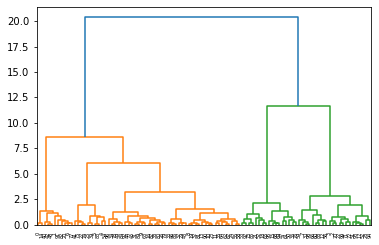

In [83]:
dend = sch.dendrogram(sch.linkage(data1.values,method='ward'))

In [84]:
H = AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')

In [85]:
pred = H.fit_predict(data)

In [86]:
temp = data

In [87]:
temp['cluster'] = pred

In [88]:
temp['cluster'].value_counts()

1    111
0     77
Name: cluster, dtype: int64

In [89]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

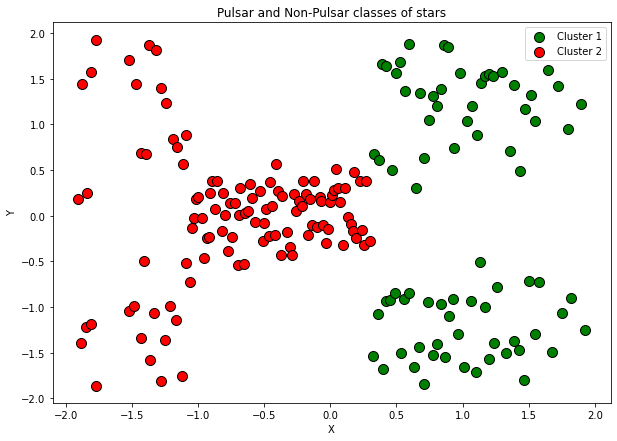

In [90]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="green",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()

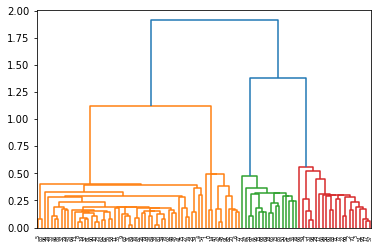

In [91]:
dend = sch.dendrogram(sch.linkage(data1.values,method='single'))

In [92]:
H = AgglomerativeClustering(n_clusters=2,linkage='single',affinity='euclidean')

In [93]:
pred = H.fit_predict(data)

In [94]:
temp = data

In [95]:
temp['cluster'] = pred

In [96]:
temp['cluster'].value_counts()

1    111
0     77
Name: cluster, dtype: int64

In [97]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

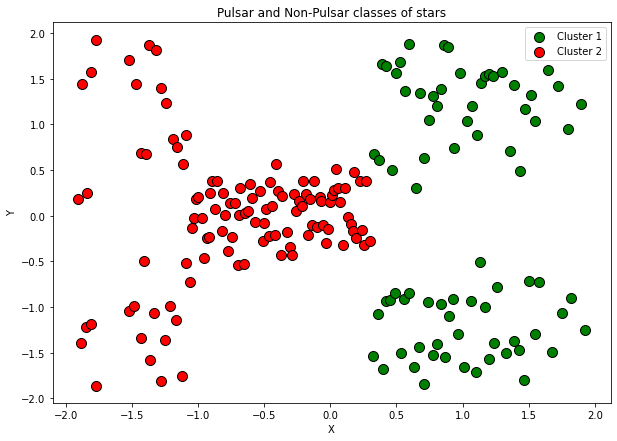

In [98]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="green",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()

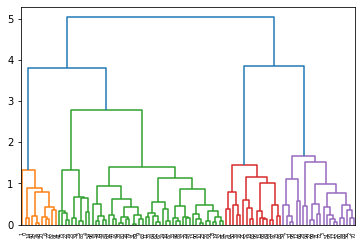

In [99]:
dend = sch.dendrogram(sch.linkage(data1.values,method='complete'))

In [100]:
H = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='euclidean')

In [101]:
pred = H.fit_predict(data)

In [102]:
temp = data

In [103]:
temp['cluster'] = pred

In [104]:
temp['cluster'].value_counts()

0    111
1     77
Name: cluster, dtype: int64

In [105]:
temp1 = temp[temp['cluster']==0]
temp2 = temp[temp['cluster']==1]

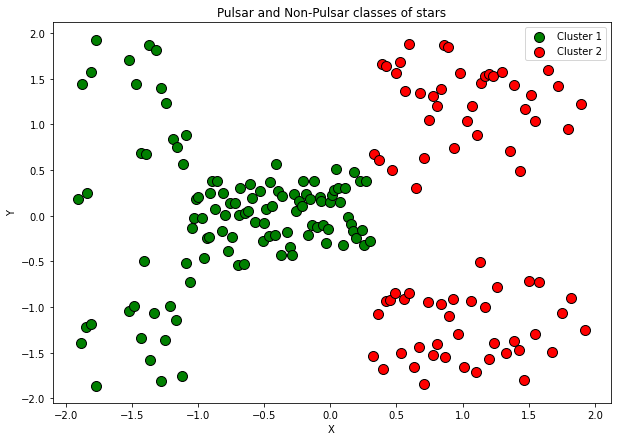

In [106]:
plt.figure(figsize=(10,7))
plt.scatter(temp1.values[:,0],temp1.values[:,1],color="green",label='Cluster 1', edgecolors='black',s=100)
plt.scatter(temp2.values[:,0],temp2.values[:,1],color="red",label='Cluster 2', edgecolors='black',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pulsar and Non-Pulsar classes of stars')
plt.legend()